# IDS705- Final Project

**Main idea of this file** 
The goal of this analysis is to examine whether diabetes is associated with a higher likelihood of cardiovascular disease (CVD), using a logistic regression model on health survey data.

**Data Plan**
- Source: A cleaned CSV dataset containing individual-level health information(https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators).
- Target Variable: cvd (binary): whether the individual has cardiovascular disease.
- Key Predictor:diabetes (binary): whether the individual has diabetes.
- Preparation Steps: Drop duplicate rows. Reset the index and rename columns for clarity.

**Technical Detail**
- Exploratory Analysis: Compared CVD rates between diabetic and non-diabetic individuals. Used pd.crosstab to examine the relationship.
- Modeling Approach: Logistic Regression via statsmodels.Logit:
- Response: cvd
- Predictor: diabetes (with intercept) Assessed coefficient significance through standard output (z-values, p-values).
- Marginal Effects: Estimated average marginal effects to interpret how diabetes affects CVD probability on the probability scale.



## Data Loading and PreProcessing

In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [1]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

import warnings

warnings.filterwarnings("ignore")
# fetch dataset
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)
# https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators

X = cdc_diabetes_health_indicators.data.features
y = cdc_diabetes_health_indicators.data.targets

In [2]:
# columns
print(X.columns)
print(y.columns)

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')
Index(['Diabetes_binary'], dtype='object')


In [3]:
from pandas.api.types import CategoricalDtype

# Age is critical feature related  to our topic- younger CVD
age_map = {
    1: "18-24",
    2: "25-29",
    3: "30-34",
    4: "35-39",
    5: "40-44",
    6: "45-49",
    7: "50-54",
    8: "55-59",
    9: "60-64",
    10: "65-69",
    11: "70-74",
    12: "75-79",
    13: "80+",
}

X["AgeGroup"] = X["Age"].map(age_map)

age_order = list(age_map.values())
X["AgeGroup"] = X["AgeGroup"].astype(
    CategoricalDtype(categories=age_order, ordered=True)
)

income_map = {
    1: "Income less than $10,000",
    2: "Income $10,000 to $14,999",
    3: "Income $15,000 to $19,999",
    4: "Income $20,000 to $24,999",
    5: "Income $25,000 to $29,999",
    6: "Income $30,000 to $34,999",
    7: "Income $35,000 to $39,999",
    8: "Income $75,000 or more",
}

X["Income"] = X["Income"].map(income_map)

# Convert to categorical with specified categories
income_order = list(income_map.values())
X["Income"] = X["Income"].astype(
    CategoricalDtype(categories=income_order, ordered=True)
)

education_map = {
    1: "Never attended school or only kindergarten",
    2: "Grades 1 through 8 (Elementary)",
    3: "Grades 9 through 11 (Some high school)",
    4: "Grade 12 or GED (High school graduate)",
    5: "College 1 year to 3 years (Some college or technical school)",
    6: "College 4 years or more (College graduate)",
}

X["Education"] = X["Education"].map(education_map)

# Convert to categorical with specified categories
education_order = list(education_map.values())
X["Education"] = X["Education"].astype(
    CategoricalDtype(categories=education_order, ordered=True)
)

sex_map = {0: "female", 1: "male"}

X["Sex"] = X["Sex"].map(sex_map)

# Convert to categorical with specified categories
sex_order = list(sex_map.values())
X["Sex"] = X["Sex"].astype(CategoricalDtype(categories=sex_order, ordered=False))

df = pd.concat([X, y], axis=1)

# df.head

In [4]:
df

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,AgeGroup,Diabetes_binary
0,1,1,1,40,1,0,0,0,0,1,...,5,18,15,1,female,9,Grade 12 or GED (High school graduate),"Income $15,000 to $19,999",60-64,0
1,0,0,0,25,1,0,0,1,0,0,...,3,0,0,0,female,7,College 4 years or more (College graduate),"Income less than $10,000",50-54,0
2,1,1,1,28,0,0,0,0,1,0,...,5,30,30,1,female,9,Grade 12 or GED (High school graduate),"Income $75,000 or more",60-64,0
3,1,0,1,27,0,0,0,1,1,1,...,2,0,0,0,female,11,Grades 9 through 11 (Some high school),"Income $30,000 to $34,999",70-74,0
4,1,1,1,24,0,0,0,1,1,1,...,2,3,0,0,female,11,College 1 year to 3 years (Some college or tec...,"Income $20,000 to $24,999",70-74,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1,1,1,45,0,0,0,0,1,1,...,3,0,5,0,male,5,College 4 years or more (College graduate),"Income $35,000 to $39,999",40-44,0
253676,1,1,1,18,0,0,0,0,0,0,...,4,0,0,1,female,11,Grades 1 through 8 (Elementary),"Income $20,000 to $24,999",70-74,1
253677,0,0,1,28,0,0,0,1,1,0,...,1,0,0,0,female,2,College 1 year to 3 years (Some college or tec...,"Income $10,000 to $14,999",25-29,0
253678,1,0,1,23,0,0,0,0,1,1,...,3,0,0,0,male,7,College 1 year to 3 years (Some college or tec...,"Income less than $10,000",50-54,0


In [6]:
df.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'AgeGroup', 'Diabetes_binary'],
      dtype='object')

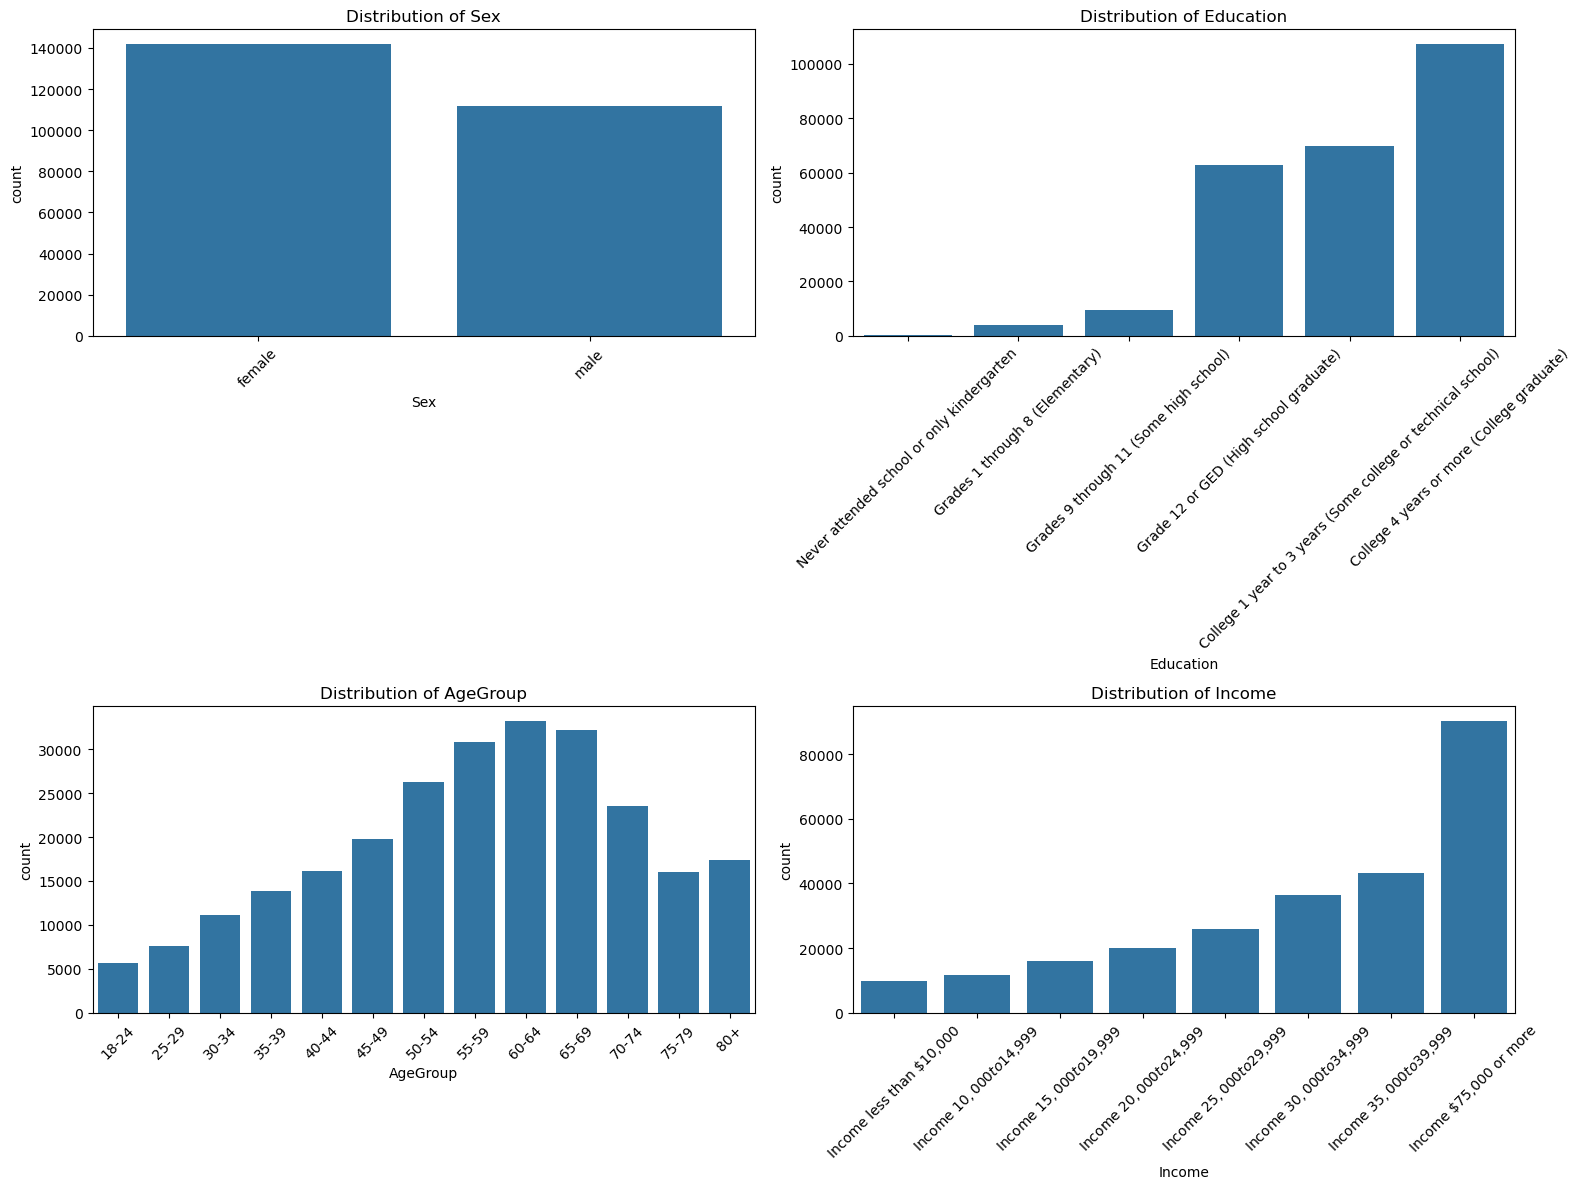

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of categorical variables to plot
categorical_vars = ["Sex", "Education", "AgeGroup", "Income"]

# Set the size for the plots
plt.figure(figsize=(16, 12))

# Plot the distributions of each categorical variable
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(2, 2, i)  # Create a grid of 2x2 for the plots
    sns.countplot(data=df, x=var)
    plt.title(f"Distribution of {var}")
    plt.xticks(rotation=45)  # Rotate the x labels for better readability

# Adjust the layout for better spacing
plt.tight_layout()
plt.show()

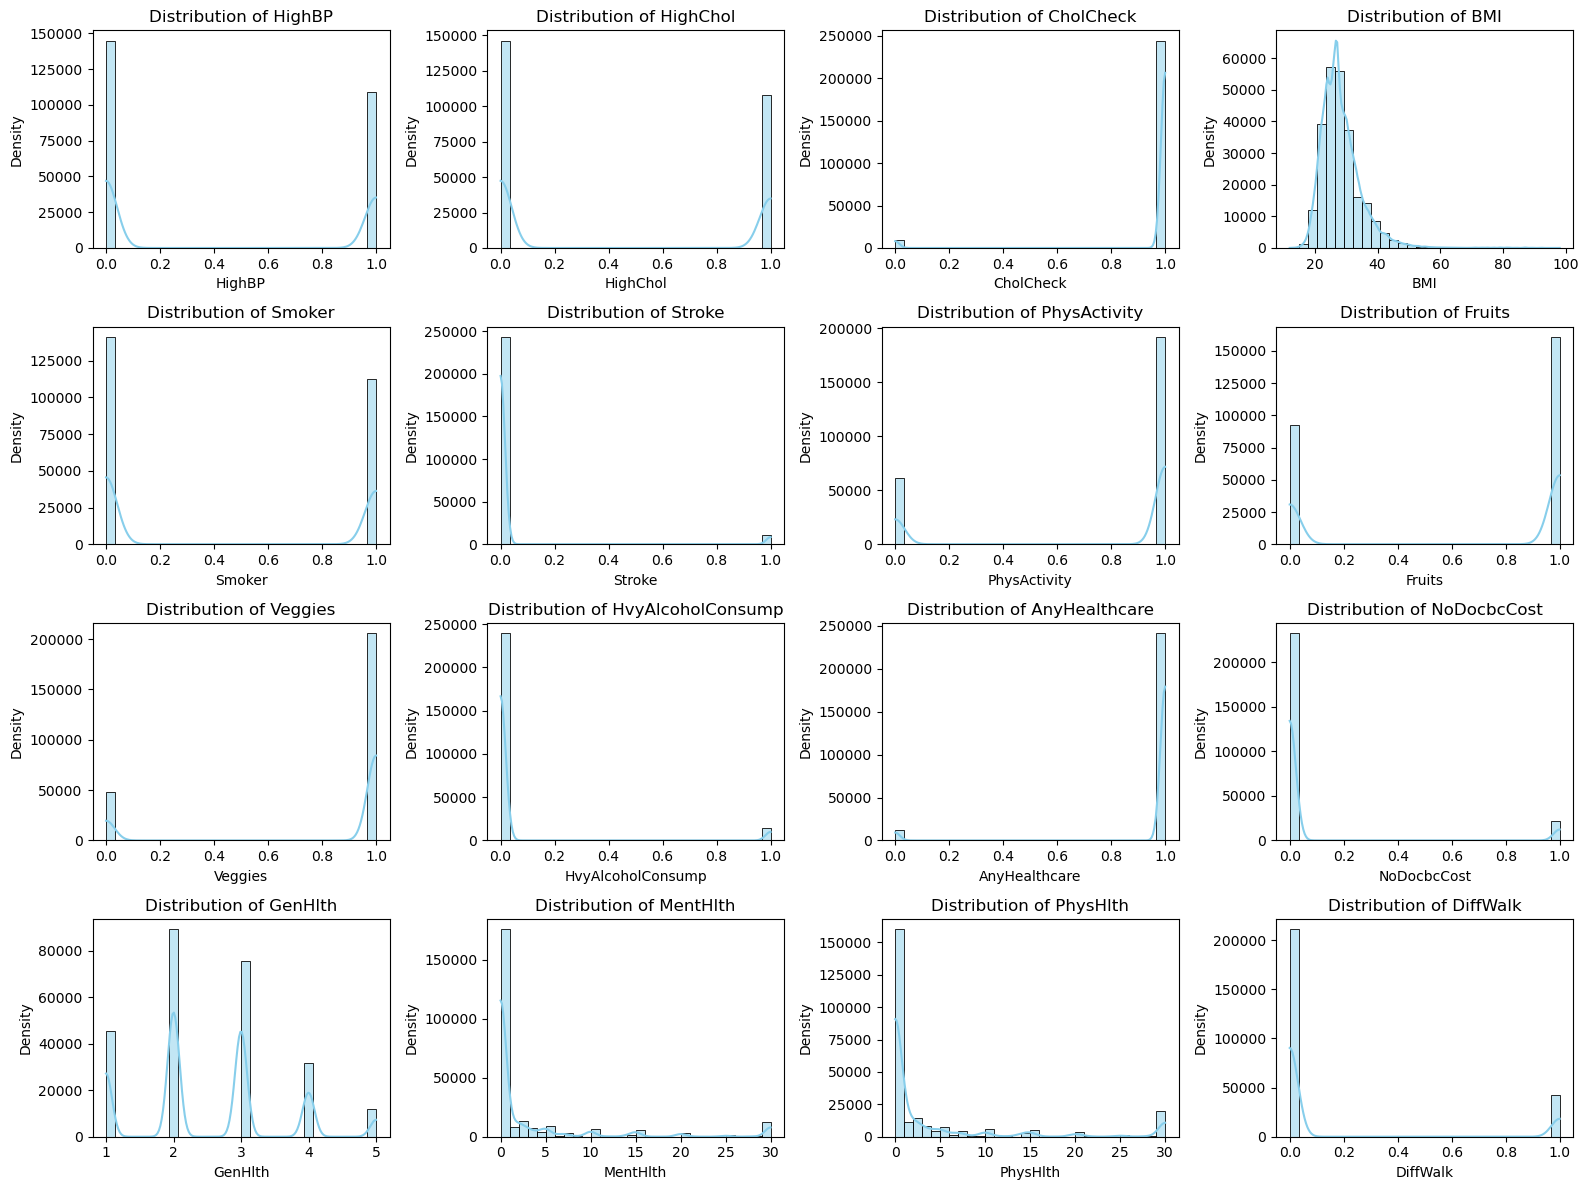

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of continuous variables to plot
continuous_vars = [
    "HighBP",
    "HighChol",
    "CholCheck",
    "BMI",
    "Smoker",
    "Stroke",
    "PhysActivity",
    "Fruits",
    "Veggies",
    "HvyAlcoholConsump",
    "AnyHealthcare",
    "NoDocbcCost",
    "GenHlth",
    "MentHlth",
    "PhysHlth",
    "DiffWalk",
]

# Set the size for the plots
plt.figure(figsize=(16, 12))

# Plot the distributions of each continuous variable
for i, var in enumerate(continuous_vars, 1):
    plt.subplot(4, 4, i)  # Create a grid of 4x4 for the plots (16 plots in total)
    sns.histplot(df[var], kde=True, color="skyblue", bins=30)  # Plot histogram with KDE
    plt.title(f"Distribution of {var}")
    plt.xlabel(var)
    plt.ylabel("Density")

# Adjust the layout for better spacing
plt.tight_layout()
plt.show()

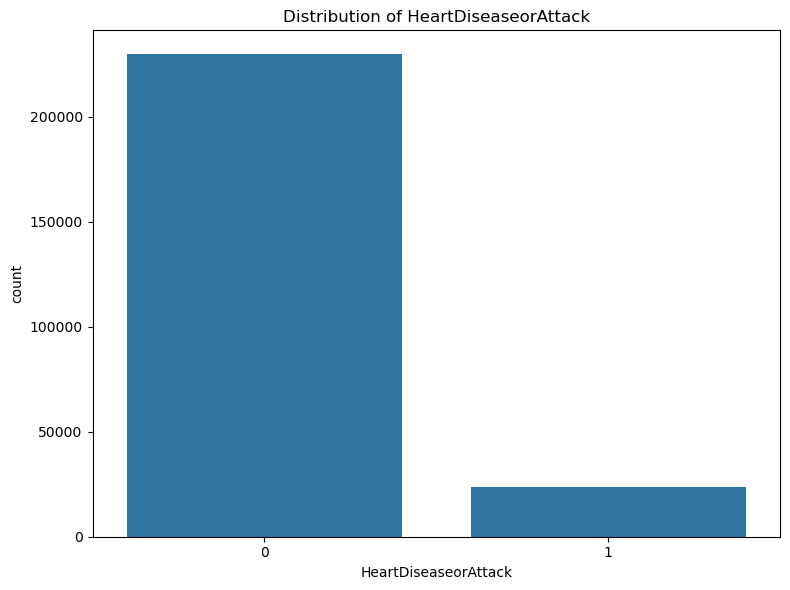

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of the target variable (HeartDiseaseorAttack)
plt.figure(figsize=(8, 6))  # Set the figure size

sns.countplot(data=df, x="HeartDiseaseorAttack")  # Count plot for the target variable
plt.title("Distribution of HeartDiseaseorAttack")

# Show the plot
plt.tight_layout()
plt.show()

In [9]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Ensure all categorical variables are converted to categorical type (e.g., 'Sex', 'Education', 'Income', 'AgeGroup', etc.)

# List of predictor variables
predictor_vars = [
    "HighBP",
    "HighChol",
    "CholCheck",
    "BMI",
    "Smoker",
    "Stroke",
    "PhysActivity",
    "Fruits",
    "Veggies",
    "HvyAlcoholConsump",
    "AnyHealthcare",
    "NoDocbcCost",
    "GenHlth",
    "MentHlth",
    "PhysHlth",
    "DiffWalk",
    "Sex",
    "Education",
    "Income",
    "AgeGroup",
    "Diabetes_binary",
]

# Prepare X (predictors) and y (target variable)
X = df[predictor_vars]
y = df["HeartDiseaseorAttack"]

# Convert categorical variables to numeric using .cat.codes
X["Sex"] = X["Sex"].cat.codes
X["Education"] = X["Education"].cat.codes
X["Income"] = X["Income"].cat.codes
X["AgeGroup"] = X["AgeGroup"].cat.codes

# Add a constant term to the predictors (intercept)
X = sm.add_constant(X)

# Check if data is now in a valid format
print(X.dtypes)  # Ensure all columns are numeric now
print(y.dtypes)  # Ensure target is numeric

const                float64
HighBP                 int64
HighChol               int64
CholCheck              int64
BMI                    int64
Smoker                 int64
Stroke                 int64
PhysActivity           int64
Fruits                 int64
Veggies                int64
HvyAlcoholConsump      int64
AnyHealthcare          int64
NoDocbcCost            int64
GenHlth                int64
MentHlth               int64
PhysHlth               int64
DiffWalk               int64
Sex                     int8
Education               int8
Income                  int8
AgeGroup                int8
Diabetes_binary        int64
dtype: object
int64


In [12]:
# Check distribution of target variable
print(y.value_counts(normalize=True))  # Proportions of the binary classes

HeartDiseaseorAttack
0    0.905814
1    0.094186
Name: proportion, dtype: float64


In [19]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Resample the dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the class distribution after resampling
print(pd.Series(y_resampled).value_counts(normalize=True))

HeartDiseaseorAttack
0    0.5
1    0.5
Name: proportion, dtype: float64


In [20]:
# Assuming you have balanced X and y after applying SMOTE
X_resampled, y_resampled = smote.fit_resample(X, y)

# Add a constant term to the predictors (intercept)
X_resampled = sm.add_constant(X_resampled)

# Fit the linear regression model (Linear Probability Model)
model_resampled = sm.OLS(
    y_resampled, X_resampled
)  # OLS regression for linear probability model
results_resampled = model_resampled.fit(
    cov_type="HC3"
)  # Robust standard errors (White's standard errors)

# Display the results
print(results_resampled.summary())

                             OLS Regression Results                             
Dep. Variable:     HeartDiseaseorAttack   R-squared:                       0.299
Model:                              OLS   Adj. R-squared:                  0.299
Method:                   Least Squares   F-statistic:                 1.537e+04
Date:                  Mon, 28 Apr 2025   Prob (F-statistic):               0.00
Time:                          17:16:39   Log-Likelihood:            -2.5182e+05
No. Observations:                459574   AIC:                         5.037e+05
Df Residuals:                    459552   BIC:                         5.039e+05
Df Model:                            21                                         
Covariance Type:                    HC3                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             

In [10]:
# Fit the linear regression model (Linear Probability Model)
model = sm.OLS(y, X)  # OLS regression for linear probability model
results = model.fit(cov_type="HC3")  # Robust standard errors (White's standard errors)

# Display the results
print(results.summary())

                             OLS Regression Results                             
Dep. Variable:     HeartDiseaseorAttack   R-squared:                       0.149
Model:                              OLS   Adj. R-squared:                  0.149
Method:                   Least Squares   F-statistic:                     1265.
Date:                  Mon, 28 Apr 2025   Prob (F-statistic):               0.00
Time:                          16:12:54   Log-Likelihood:                -27212.
No. Observations:                253680   AIC:                         5.447e+04
Df Residuals:                    253658   BIC:                         5.470e+04
Df Model:                            21                                         
Covariance Type:                    HC3                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

             Variable         VIF
0               const  103.527926
1              HighBP    1.340701
2            HighChol    1.175877
3           CholCheck    1.033396
4                 BMI    1.159356
5              Smoker    1.090075
6              Stroke    1.062705
7        PhysActivity    1.157371
8              Fruits    1.112493
9             Veggies    1.112371
10  HvyAlcoholConsump    1.025149
11      AnyHealthcare    1.113168
12        NoDocbcCost    1.144134
13            GenHlth    1.804761
14           MentHlth    1.239472
15           PhysHlth    1.622337
16           DiffWalk    1.531856
17                Sex    1.066162
18          Education    1.326482
19             Income    1.504903
20           AgeGroup    1.339197
21    Diabetes_binary    1.189204


In [21]:
y_pred_proba = results.predict(X)

treated_group = df[df["Diabetes_binary"] == 1]
control_group = df[df["Diabetes_binary"] == 0]

mean_treated = y_pred_proba[treated_group.index].mean()

mean_control = y_pred_proba[control_group.index].mean()

ATE = mean_treated - mean_control

print(f"Estimated ATE for diabetes: {ATE:.4f}")

Estimated ATE for diabetes: 0.1495


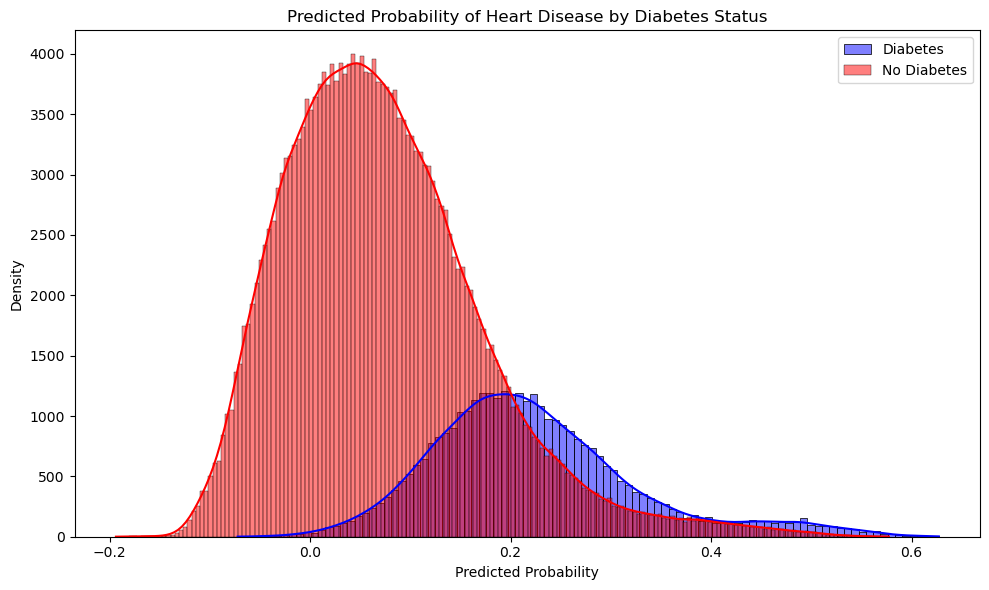

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Add the predicted probabilities to the DataFrame
df["predicted_prob"] = y_pred_proba

# Set the size of the figure
plt.figure(figsize=(10, 6))

# Plot the predicted probabilities for individuals with diabetes (treated group)
sns.histplot(
    df[df["Diabetes_binary"] == 1]["predicted_prob"],
    color="blue",
    label="Diabetes",
    kde=True,  # Kernel Density Estimation for a smooth curve
)

# Plot the predicted probabilities for individuals without diabetes (control group)
sns.histplot(
    df[df["Diabetes_binary"] == 0]["predicted_prob"],
    color="red",
    label="No Diabetes",
    kde=True,  # Kernel Density Estimation for a smooth curve
)

# Add titles and labels
plt.title("Predicted Probability of Heart Disease by Diabetes Status")
plt.xlabel("Predicted Probability")
plt.ylabel("Density")

# Display the legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()